# Oscillation injection

A testing notebook.

In [7]:
import os
import numpy as np
import pandas as pd

from scipy import signal

from voltagebudget.util import burst 
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

ms = 1e3

In [8]:
data_path = "/Users/qualia/Code/Segregated-Dendrite-Deep-Learning/Simulations/"

## Injection function

Visualize it.

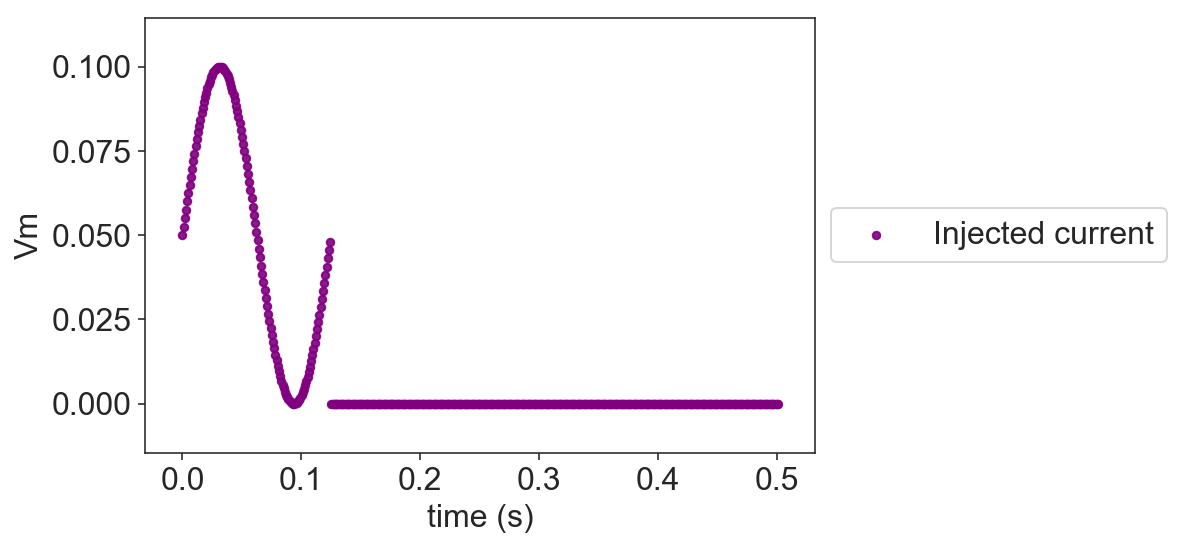

In [9]:
# Same params as in the main code:
A = 0.1
f = 8
n_cycles = 1
phi = 0
onset = 0# .125/ms
dt = 1
min_A = 0
integration_counter = 0
tspan = (integration_counter / ms, integration_counter + 500 / ms + (1 / ms))

times, x = burst(
    tspan,
    onset,
    n_cycles,
    A,
    f,
    phi,
    1 / (dt * ms),
    min_A=min_A)

plt.scatter(times, x, color="purple", alpha=.9, s=14, label="Injected current")
plt.ylabel("Vm")
plt.xlabel("time (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Load test data

In [ ]:
comp = np.loadtxt(os.path.join(data_path, "./Comp Simulation/C_hist_0.csv"))
osc = np.loadtxt(os.path.join(data_path, "./Osc Simulation/C_hist_0.csv"))
osc_only = np.loadtxt(os.path.join(data_path, "./Osc Simulation/O_hist_0.csv"))

In [ ]:
comp_idx = comp[:, 0].astype(int)
osc_idx = osc[:, 0].astype(int)
osc_only_idx = osc_only[:, 0].astype(int)

In [ ]:
print(comp.shape[0], osc.shape[0], osc_only.shape[0])

## Plot example trials

In [ ]:
i = 10 # cell number
n = 0 # time index
m = 300

# Get trial timecourse
comp_t = comp[comp_idx[n:m], i]
osc_t = osc[osc_idx[n:m], i]
oo_t = osc_only[osc_only_idx[n:m], i]

# And its power spectra
freqs_comp, P_comp = signal.periodogram(comp_t, fs=1000)
freqs_osc, P_osc = signal.periodogram(osc_t, fs=1000)
freqs_oo, P_oo = signal.periodogram(oo_t, fs=1000)


# ----------------------------------------------------------------------------
fig = plt.figure(figsize=(6, 10))
grid = plt.GridSpec(3, 1, wspace=0.3, hspace=0.8)

# Time
plt.subplot(grid[0, 0])
# plt.scatter(comp_idx[n:m], comp_t, color="grey", alpha=.9, s=14, label="Comp")
# plt.scatter(osc_idx[n:m], osc_t, color="black", alpha=.9, s=14, label="Comp+Osc")
plt.scatter(osc_only_idx[n:m], oo_t, color="purple", alpha=.9, s=14, label="Osc only")
plt.plot(comp_idx[n:m], np.repeat(0, len(comp_idx[n:m])), alpha=1, color="black")
plt.ylabel("Vm")
plt.xlabel("time (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Time
plt.subplot(grid[1, 0])
plt.scatter(comp_idx[n:m], osc_t-comp_t, color="black", alpha=.9, s=14, label="Osc-Comp")
plt.plot(comp_idx[n:m], np.repeat(0, len(comp_idx[n:m])), alpha=1, color="black")
plt.ylabel("Vm")
plt.xlabel("time (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Freq
plt.subplot(grid[2, 0])
plt.plot(freqs_comp, P_comp, color="grey", linestyle='-', marker='', alpha=.8, label="Comp")
plt.plot(freqs_osc, P_osc, color="black", linestyle='-', marker='', alpha=.8, label="Comp+Osc")
plt.plot(freqs_oo, P_oo, color="purple", linestyle='-', marker='', alpha=.8, label="Osc only")
plt.ylabel("Power")
plt.xlabel("Freq. (Hz)")
plt.xlim(0, 50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()